In [64]:
import numpy as np
import os 
import nibabel as nib
from glob import *
import pandas as pd

timeseries =nib.load(f'I:\LABComputer\Work\Matlab\Work\Age\ICA\Age_conn_sub045_timecourses_ica_s1_.nii')
ica = timeseries.get_fdata()

In [65]:
age = pd.read_excel(r'F:\Jupyter\Age\age.xlsx')
age_values = age['Age_Years']

DMN = [9,11,30,38,43,47,59,62,66,74,80,87,88,90,95,98] # 16
SMN = [8,33,58,67,68,75,79,84] # 8 
VIS = [5,19,34,60,69,82,83] # 7
SC = [20,21,23,41,44,53,55,71,77] # 9
CC = [10,13,24,25,26,32,42,49,51,52,70,76,85,86,93,94] # 16
AUD = [6,15,63,81] # 4

all_con = np.array(DMN+SMN+VIS+SC+CC+AUD)

LDI = np.array( [0.33333333,  0.19444444,  0.44444444,  0.55555556, 0.16666667,  0.00000000,-0.19444444,
 0.08333333 , 0.4722222,  0.13888889 , 0.16666667,  0.33333333,  0.00000000,  0.41666667,
  0.16666667,  0.19444444,  0.27777778,  0.36111111,  0.00000000,  0.36111111,  0.44444444,
  0.30555556,  0.38888889,  0.25000000,  0.08333333,  0.22222222,  0.27777778,  0.69444444,
  0.47222222,  0.16666667,  0.00000000,  0.52777778,  0.13888889,  0.50000000,0.02777778,  0.16666667,  
    0.00000000 , 0.08333333 , 0.00000000  ,0.11111111 , 0.25000000 , 
        0.05555556, 0.16666667,  0.11111111 , 0.50000000 , 0.08333333 , 0.41666667,-0.02777778,
  0.05555556,  0.44444444 , 0.00000000 , 0.22222222, -0.05555556, -0.08333333 , 0.13888889,
  0.19444444,  0.00000000, -0.30555556,  0.02777778,  0.11111111, -0.36111111 , 0.44444444])

In [71]:
## ICA timeseries 
rsn_timeseries = []
# rootPath = 'F:\Matlab\Work\Intrinsic\gICA_100'
rootPath = f'G:\LABComputer\Work\Matlab\Work\Age\ICA'
for root,dirs,files in os.walk(rootPath):
    # print(root)
    for match in glob(os.path.join(root, '*sub*timecourses_ica_s1_.nii')):
        print(match)
        all_ica_timeseries =nib.load(match).get_fdata()
        RSN = all_ica_timeseries[:,all_con-1]
        rsn_timeseries.append(RSN)
rsn_timeseries = np.array(rsn_timeseries)

G:\LABComputer\Work\Matlab\Work\Age\ICA\Age_conn_sub001_timecourses_ica_s1_.nii
G:\LABComputer\Work\Matlab\Work\Age\ICA\Age_conn_sub002_timecourses_ica_s1_.nii
G:\LABComputer\Work\Matlab\Work\Age\ICA\Age_conn_sub003_timecourses_ica_s1_.nii
G:\LABComputer\Work\Matlab\Work\Age\ICA\Age_conn_sub004_timecourses_ica_s1_.nii
G:\LABComputer\Work\Matlab\Work\Age\ICA\Age_conn_sub005_timecourses_ica_s1_.nii
G:\LABComputer\Work\Matlab\Work\Age\ICA\Age_conn_sub006_timecourses_ica_s1_.nii
G:\LABComputer\Work\Matlab\Work\Age\ICA\Age_conn_sub007_timecourses_ica_s1_.nii
G:\LABComputer\Work\Matlab\Work\Age\ICA\Age_conn_sub008_timecourses_ica_s1_.nii
G:\LABComputer\Work\Matlab\Work\Age\ICA\Age_conn_sub009_timecourses_ica_s1_.nii
G:\LABComputer\Work\Matlab\Work\Age\ICA\Age_conn_sub010_timecourses_ica_s1_.nii
G:\LABComputer\Work\Matlab\Work\Age\ICA\Age_conn_sub011_timecourses_ica_s1_.nii
G:\LABComputer\Work\Matlab\Work\Age\ICA\Age_conn_sub012_timecourses_ica_s1_.nii
G:\LABComputer\Work\Matlab\Work\Age\ICA\

In [257]:
print(rsn_timeseries.shape)

def intrinic_timescale_interp(intter):
    # autocorr = stattools.acf(ica)
    return np.sum(intter[1:list(intter<0).index(True)])

def intrinic_timescale(ica):
    autocorr = stattools.acf(ica)
    return np.sum(autocorr[1:list(autocorr<0).index(True)])
    
def calculate_acorr_per_subj(icas):
    return [intrinic_timescale(ica) for ica in icas ]

def network_agv(it_icas):
    dmn = np.mean(it_icas[:11])
    smn = np.mean(it_icas[11:17])
    vis = np.mean(it_icas[17:29])
    sc = np.mean(it_icas[29:36])
    cc = np.mean(it_icas[36:54])
    aud = np.mean(it_icas[54:60])
    return [dmn,smn,vis,sc,cc,aud]

def acf_curve(icas):
  return np.array([stattools.acf(ica) for ica in icas])

(62, 295, 60)


In [262]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa import stattools

n_subj, timepoint, n_c = rsn_timeseries.shape
it_ica_subj_interp = np.array([intrinic_timescale_interp(interpp) for interpp in all_auc_acf_interp])
it_network_subj_interp = np.array([network_agv(it_ica_subj_interp[i*60:(i+1)*60]) for i in range(n_subj)])

print(it_network_subj_interp.shape)

(62, 6)


In [181]:
ind = [str(i) for i in np.arange(25)]
subj = [str(i+1) for i in np.arange(62)]
ica_label = ['DMN_1', 'DMN_2', 'DMN_3', 'DMN_4', 'DMN_5', 'DMN_6', 'DMN_7', 'DMN_8', 'DMN_9', 'DMN_10', 
             'DMN_11', 'SMN_1', 'SMN_2', 'SMN_3', 'SMN_4', 'SMN_5', 'SMN_6', 
             'VIS_1', 'VIS_2', 'VIS_3', 'VIS_4', 'VIS_5', 'VIS_6', 'VIS_7', 'VIS_8', 'VIS_9', 'VIS_10', 'VIS_11', 'VIS_12',
             'SC_1', 'SC_2', 'SC_3', 'SC_4', 'SC_5', 'SC_6', 'SC_7', 
              'CC_1', 'CC_2', 'CC_3', 'CC_4', 'CC_5','CC_6', 'CC_7', 'CC_8', 'CC_9', 'CC_10', 'CC_11', 'CC_12',
             'CC_13', 'CC_14', 'CC_15', 'CC_16', 'CC_17', 'CC_18',
             'AUD_1', 'AUD_2', 'AUD_3', 'AUD_4', 'AUD_5', 'AUD_6']
# print(subj)
subjs = []
for i in subj:
    # print(i)
    subjs.extend([i]*25*60)
icas_label = []
for i in ica_label:
    # print(i)
    icas_label.extend([i]*25)
# # print(subjs)
all_auc_acf_df = pd.DataFrame(all_auc_acf.flatten(),columns = ['Timescale'])
all_auc_acf_df.insert(0,'Timelag',ind*60*62)
all_auc_acf_df.insert(0,'Subjs',subjs)
all_auc_acf_df.insert(0,'Group',np.array(['young']*34*25*60+['elder']*28*25*60))
all_auc_acf_df.insert(0,'ICA',np.array(icas_label*62))
print(all_auc_acf_df)
all_auc_acf_df.to_csv('./timescale/all_auc_acf_df_0429.csv',index = False)

(62, 295, 60)
         ICA  Group Subjs Timelag  Timescale
0      DMN_1  young     1       0   1.000000
1      DMN_1  young     1       1   0.481084
2      DMN_1  young     1       2  -0.176800
3      DMN_1  young     1       3  -0.534716
4      DMN_1  young     1       4  -0.404009
...      ...    ...   ...     ...        ...
92995  AUD_6  elder    62      20  -0.084356
92996  AUD_6  elder    62      21   0.006375
92997  AUD_6  elder    62      22   0.030160
92998  AUD_6  elder    62      23   0.144203
92999  AUD_6  elder    62      24  -0.043901

[93000 rows x 5 columns]


In [235]:
# ica1 = rsn_timeseries[1,:,0]
# # ica2 = rsn_timeseries[35,:,0]
# autocorr1 = stattools.acf(ica1)
# autocorr2 = stattools.acf(ica2)
print(rsn_timeseries.shape)
all_auc_acf_interp = []
for i in range(n_subj):
  icas = rsn_timeseries[i]
  # print(icas.shape)
  ica_acf_curve = acf_curve(icas.T)
  # print(ica_acf_curve.shape)
  for ica_curve in ica_acf_curve:
    x = range(25)
    xvals = np.linspace(0, 25, 50)
    yinterp = np.interp(xvals, x, ica_curve)
    all_auc_acf_interp.append(yinterp)

all_auc_acf_interp = np.array(all_auc_acf_interp)
# print(all_auc_acf[:25])

ind = [str(i) for i in np.arange(50)]
subj = [str(i+1) for i in np.arange(62)]
ica_label = ['DMN_1', 'DMN_2', 'DMN_3', 'DMN_4', 'DMN_5', 'DMN_6', 'DMN_7', 'DMN_8', 'DMN_9', 'DMN_10', 
             'DMN_11', 'SMN_1', 'SMN_2', 'SMN_3', 'SMN_4', 'SMN_5', 'SMN_6', 
             'VIS_1', 'VIS_2', 'VIS_3', 'VIS_4', 'VIS_5', 'VIS_6', 'VIS_7', 'VIS_8', 'VIS_9', 'VIS_10', 'VIS_11', 'VIS_12',
             'SC_1', 'SC_2', 'SC_3', 'SC_4', 'SC_5', 'SC_6', 'SC_7', 
              'CC_1', 'CC_2', 'CC_3', 'CC_4', 'CC_5','CC_6', 'CC_7', 'CC_8', 'CC_9', 'CC_10', 'CC_11', 'CC_12',
             'CC_13', 'CC_14', 'CC_15', 'CC_16', 'CC_17', 'CC_18',
             'AUD_1', 'AUD_2', 'AUD_3', 'AUD_4', 'AUD_5', 'AUD_6']
# print(subj)
subjs = []
for i in subj:
    # print(i)
    subjs.extend([i]*50*60)
icas_label = []
for i in ica_label:
    # print(i)
    icas_label.extend([i]*50)
# # print(subjs)
all_auc_acf_interp_df = pd.DataFrame()
all_auc_acf_interp_df = pd.DataFrame(all_auc_acf_interp.flatten(),columns = ['Timescale'])
all_auc_acf_interp_df.insert(0,'Timelag',ind*60*62)
all_auc_acf_interp_df.insert(0,'Subjs',subjs)
all_auc_acf_interp_df.insert(0,'Group',np.array(['young']*34*50*60+['elder']*28*50*60))
all_auc_acf_interp_df.insert(0,'ICA',np.array(icas_label*62))
print(all_auc_acf_interp_df)
# all_auc_acf_df.to_csv('./timescale/young_auc_acf_df.csv',index = False)
# all_auc_acf_df.to_csv('./timescale/all_auc_acf_df3.csv',index = False)
# sns.lineplot(x = 'Timelag', y = 'Timescale', hue = 'Subjs',data= all_auc_acf_df[])
# sns.despine()
all_auc_acf_interp_df.to_csv('./timescale/all_auc_acf_interp_df_0429.csv',index = False)

(62, 295, 60)
          ICA  Group Subjs Timelag  Timescale
0       DMN_1  young     1       0   1.000000
1       DMN_1  young     1       1   0.735247
2       DMN_1  young     1       2   0.467658
3       DMN_1  young     1       3   0.132003
4       DMN_1  young     1       4  -0.191408
...       ...    ...   ...     ...        ...
185995  AUD_6  elder    62      45   0.139548
185996  AUD_6  elder    62      46   0.055909
185997  AUD_6  elder    62      47  -0.040062
185998  AUD_6  elder    62      48  -0.043901
185999  AUD_6  elder    62      49  -0.043901

[186000 rows x 5 columns]


In [82]:
subj_ica_label = ['young']*60*34+ ['elder']*60*28
subj_net_label = ['young']*6*34+ ['elder']*6*28
# subj_label = ['young']*34+ ['elder']*28

# subj_label = ['young']*34+['elder']*28
ica_label = ['DMN_1', 'DMN_2', 'DMN_3', 'DMN_4', 'DMN_5', 'DMN_6', 'DMN_7', 'DMN_8', 'DMN_9', 'DMN_10', 
             'DMN_11', 'SMN_1', 'SMN_2', 'SMN_3', 'SMN_4', 'SMN_5', 'SMN_6', 
             'VIS_1', 'VIS_2', 'VIS_3', 'VIS_4', 'VIS_5', 'VIS_6', 'VIS_7', 'VIS_8', 'VIS_9', 'VIS_10', 'VIS_11', 'VIS_12',
             'SC_1', 'SC_2', 'SC_3', 'SC_4', 'SC_5', 'SC_6', 'SC_7', 
              'CC_1', 'CC_2', 'CC_3', 'CC_4', 'CC_5','CC_6', 'CC_7', 'CC_8', 'CC_9', 'CC_10', 'CC_11', 'CC_12',
             'CC_13', 'CC_14', 'CC_15', 'CC_16', 'CC_17', 'CC_18',
             'AUD_1', 'AUD_2', 'AUD_3', 'AUD_4', 'AUD_5', 'AUD_6']
net_label = ['DMN','SMN','VIS','SC','CC','AUD']

In [263]:
# timescale_ica = it_ica_subj.flatten()
# timescale_net = it_network_subj.flatten()

timescale_ica = it_ica_subj_interp.flatten()
timescale_net = it_network_subj_interp.flatten()

timescale_ica_dict = {'Group':subj_ica_label, 'ICA':ica_label*62,'Timescale':timescale_ica}
timescale_ica_df = pd.DataFrame(timescale_ica_dict)
timescale_ica_df.to_csv('./timescale/all_timescale_ica_interp_df_0426.csv',index = False)

# subj_label_net = ['Young']*6*34
timescale_net_dict = {'Group':subj_net_label, 'ICA':net_label*62,'Timescale':timescale_net}
timescale_net_df = pd.DataFrame(timescale_net_dict)
timescale_net_df.to_csv('./timescale/all_timescale_net_interp_df_0426.csv',index = False)
print(timescale_ica_df)
print(timescale_net_df)
# timescale_net_df.to_csv('./timescale/young_timescale_net_df2.csv',index = False)

[1.33490701 1.44839952 2.50438342 ... 1.74415317 1.42761436 0.84722787]
      Group    ICA  Timescale
0     young  DMN_1   1.334907
1     young  DMN_2   1.448400
2     young  DMN_3   2.504383
3     young  DMN_4   1.879600
4     young  DMN_5   1.676848
...     ...    ...        ...
3715  elder  AUD_2   1.155451
3716  elder  AUD_3   1.626046
3717  elder  AUD_4   1.744153
3718  elder  AUD_5   1.427614
3719  elder  AUD_6   0.847228

[3720 rows x 3 columns]
     Group  ICA  Timescale
0    young  DMN   2.167109
1    young  SMN   2.560648
2    young  VIS   2.405194
3    young   SC   1.944506
4    young   CC   2.276942
..     ...  ...        ...
367  elder  SMN   1.220203
368  elder  VIS   1.789740
369  elder   SC   1.519112
370  elder   CC   1.207186
371  elder  AUD   1.207453

[372 rows x 3 columns]


In [295]:
import scipy.stats as stats
# from bioinfokit.analys import stat,get_data
from statsmodels.stats.multitest import multipletests
net_intt = timescale_net_df['Timescale'].values
global_interp_int = [np.mean(net_intt[i*6:(i+1)*6]) for i in range(62) ]
print(global_interp_int)
tvalue, pvalue = stats.ttest_ind(global_interp_int[:28],global_interp_int[28:],equal_var = False)
print(tvalue, pvalue)

global_interp_int_dict = {}
global_interp_int_dict['Subject'] = [i for i in range(1,63)]
global_interp_int_dict['Group'] = ['Younger']*34 + ['Elder']*28
# global_int_dict['Grobal_int'] = global_int
global_interp_int_dict['intt'] = global_interp_int
global_interp_int_df = pd.DataFrame(global_interp_int_dict)
global_interp_int_df.to_csv('global_interp_int_df.csv',index =False)

[2.277143914907724, 3.173101513552437, 2.4922216995847326, 1.9110462693207886, 1.147843452531788, 3.4604448696296704, 2.5462069622164845, 2.6583192015079833, 1.8857598412236243, 2.1116694081189697, 2.7819284644195412, 3.0744744437374005, 2.418962732613845, 2.22817105135432, 1.5950064750886568, 1.5314399067623823, 2.2731917154476986, 2.221495727577977, 2.316133897975123, 3.274649869206931, 1.882652644148381, 2.7873981740749634, 1.58181883211176, 2.1873429088338208, 2.15897312996514, 2.37457683632385, 1.422299275268491, 3.0132127436711933, 1.7822670225008121, 2.2403347192726812, 2.2265221190847306, 1.8850272652058193, 2.343833815241804, 2.72566127224234, 1.6461659283579788, 2.235689763331023, 1.3717077313051513, 1.5873459361635494, 1.2023143177972273, 0.8042555539311652, 1.9855798500903354, 3.19231779756041, 3.043936326176684, 2.7881320714366993, 1.8604845884845231, 1.333209387110871, 1.2390095416368598, 1.619130424179044, 2.3987774411874963, 1.08973681851309, 3.3820647765928284, 1.76459

In [266]:
timescale_ica_df = pd.read_csv('./timescale/all_timescale_ica_interp_df_0426.csv')
print(timescale_ica_df)

      Group    ICA  Timescale
0     young  DMN_1   1.334907
1     young  DMN_2   1.448400
2     young  DMN_3   2.504383
3     young  DMN_4   1.879600
4     young  DMN_5   1.676848
...     ...    ...        ...
3715  elder  AUD_2   1.155451
3716  elder  AUD_3   1.626046
3717  elder  AUD_4   1.744153
3718  elder  AUD_5   1.427614
3719  elder  AUD_6   0.847228

[3720 rows x 3 columns]


# varibility 

In [88]:
ica_it_groupbyfactor = timescale_ica_df.groupby('ICA')
vy = []
ve = []

variance_dict = {}
variance_dict['Group'] = ['young']*60+['elder']*60
variance_dict['ica'] = []
variance_dict['tau_variance'] = []
icas= []
for ica, group in ica_it_groupbyfactor:
        # print(ica,group)
        # break
        icas.append(ica)
        young = group[group['Group']=='young']['Timescale'].values
        elder = group[group['Group']=='elder']['Timescale'].values
        vy.append(np.var(young))
        ve.append(np.var(elder))
        # print(vy,ve)
        # break
print(np.array(vy)+np.array(ve))
print(icas*2)
variance_dict['tau_variance'] = np.concatenate((np.array(vy),np.array(ve)))
variance_dict['ica']  = np.array(icas*2)
print(variance_dict['tau_variance'])

print(len(variance_dict['ica']),len(variance_dict['tau_variance']))
variance_df = pd.DataFrame(variance_dict)
print(variance_df)
# variance_df.to_csv('./timescale/timescale_var_ica_df_0426.csv',index = False)

[0.47274047 0.57439368 0.77016755 0.74690422 0.85601149 0.90691188
 0.6240543  1.07135556 0.3583877  0.29612167 0.31695715 2.19685787
 0.84225965 0.97868435 0.53188508 0.73567849 0.44067738 0.10554944
 1.20527401 1.39195595 1.07451823 1.00568462 0.65814826 0.63064241
 0.90894733 0.8065194  0.63909336 0.32201121 0.82315843 1.06664093
 0.70984324 0.5219125  0.35152327 0.53311649 0.35272727 1.02001063
 0.48580151 0.70083219 0.90713781 0.8398775  0.48121137 1.84124549
 1.11838162 0.65576691 0.61608313 0.77741612 0.72067322 0.92165049
 0.763816   0.98690295 0.86942003 0.81204663 1.34232665 0.54600064
 0.48891173 0.84414127 0.4291635  0.44452341 0.60418834 0.89101273]
['AUD_1', 'AUD_2', 'AUD_3', 'AUD_4', 'AUD_5', 'AUD_6', 'CC_1', 'CC_10', 'CC_11', 'CC_12', 'CC_13', 'CC_14', 'CC_15', 'CC_16', 'CC_17', 'CC_18', 'CC_2', 'CC_3', 'CC_4', 'CC_5', 'CC_6', 'CC_7', 'CC_8', 'CC_9', 'DMN_1', 'DMN_10', 'DMN_11', 'DMN_2', 'DMN_3', 'DMN_4', 'DMN_5', 'DMN_6', 'DMN_7', 'DMN_8', 'DMN_9', 'SC_1', 'SC_2', 'SC_

In [89]:
import pingouin as pg 
print(variance_df)
pg.welch_anova(dv= 'tau_variance', between = 'Group', data = variance_df)

     Group    ica  tau_variance
0    young  AUD_1      0.260830
1    young  AUD_2      0.270916
2    young  AUD_3      0.375875
3    young  AUD_4      0.288854
4    young  AUD_5      0.428135
..     ...    ...           ...
115  elder  VIS_5      0.388208
116  elder  VIS_6      0.197215
117  elder  VIS_7      0.239628
118  elder  VIS_8      0.419207
119  elder  VIS_9      0.582159

[120 rows x 3 columns]


,Source,ddof1,ddof2,F,p-unc,np2
0,Group,1,114.017485,0.695539,0.406031,0.00586


In [91]:
maxvar_y_roi = icas[int(np.argmax(vy))]
maxvar_e_roi = icas[int(np.argmax(ve))]
print(maxvar_y_roi, maxvar_e_roi)

minvar_y_roi = icas[int(np.argmin(vy))]
minvar_e_roi = icas[int(np.argmin(ve))]
print(minvar_y_roi, minvar_e_roi)
# ratio_y = 

CC_14 SC_7
CC_3 CC_3


In [52]:
# variance_df

In [268]:
subj = [[i+1]*60 for i in range(62)]
subjs = np.array(subj).flatten()
timescale_ica_df.insert(0,'Subj',subjs)
timescale_ica_df

,Subj,Group,ICA,Timescale
0,1,young,DMN_1,1.334907
1,1,young,DMN_2,1.448400
2,1,young,DMN_3,2.504383
3,1,young,DMN_4,1.879600
4,1,young,DMN_5,1.676848
...,...,...,...,...
3715,62,elder,AUD_2,1.155451
3716,62,elder,AUD_3,1.626046
3717,62,elder,AUD_4,1.744153
3718,62,elder,AUD_5,1.427614


In [269]:
it_groupbysubj = timescale_ica_df.groupby('Subj')

variance_ratio_dict = {}
variance_ratio_dict['Group'] = ['Young']*34+['Elderly']*28
variance_ratio_dict['Subj'] = []
variance_ratio_dict['difference'] = []
variance_ratio_dict['ratio'] = []
variance_ratio_dict['Var'] = []
for subj, group in it_groupbysubj:
        # print(subj, group)
        # break
        # print(np.min(group['Timescale'].values),np.max(group['Timescale'].values))
        min_int = np.min(group['Timescale'].values)
        variance_ratio_dict['Var'].append(np.var(group['Timescale'].values))
        if min_int <0.0001:
            min_int = 0.0001
        variance_ratio_dict['difference'].append(\
              (np.max(group['Timescale'].values)-min_int)/np.max(group['Timescale'].values))    
        variance_ratio_dict['ratio'].append(\
              min_int/np.max(group['Timescale'].values))
        variance_ratio_dict['Subj'].append(subj)
        
variance_ratio_df = pd.DataFrame(variance_ratio_dict)
print(variance_ratio_df)
variance_ratio_df.to_csv('./timescale/timescale_difference_interp_df_0426.csv',index = False)

      Group  Subj  difference     ratio       Var
0     Young     1    0.931119  0.068881  1.714969
1     Young     2    0.946615  0.053385  2.551311
2     Young     3    0.884614  0.115386  1.446437
3     Young     4    0.910385  0.089615  1.321139
4     Young     5    0.975444  0.024556  0.853369
..      ...   ...         ...       ...       ...
57  Elderly    58    0.963676  0.036324  0.409724
58  Elderly    59    0.849770  0.150230  0.782744
59  Elderly    60    0.932721  0.067279  0.804981
60  Elderly    61    0.923057  0.076943  1.074220
61  Elderly    62    0.925267  0.074733  0.830946

[62 rows x 5 columns]


# variance_net

In [98]:
timescale_net_df = pd.read_csv('./timescale/all_timescale_net_df_0426.csv')
print(timescale_net_df)

     Group  ICA  Timescale
0    young  DMN   0.871218
1    young  SMN   1.070489
2    young  VIS   0.991198
3    young   SC   0.756666
4    young   CC   0.922342
..     ...  ...        ...
367  elder  SMN   0.396776
368  elder  VIS   0.686420
369  elder   SC   0.550085
370  elder   CC   0.385988
371  elder  AUD   0.380562

[372 rows x 3 columns]


In [296]:
net_it_groupbyfactor = timescale_net_df.groupby('ICA')
vy = []
ve = []

net_variance_dict = {}
net_variance_dict['Group'] = ['young']*6+['elder']*6
net_variance_dict['net'] = []
net_variance_dict['tau_variance'] = []
nets= []

for net, group in net_it_groupbyfactor:
        # print(net,group)
        # break
        nets.append(net)
        young = group[group['Group']=='young']['Timescale'].values
        elder = group[group['Group']=='elder']['Timescale'].values
        vy.append(np.var(young))
        ve.append(np.var(elder))
        # print(vy,ve)
        
print(np.concatenate((np.array(vy),np.array(ve))))
print(nets*2)
net_variance_dict['tau_variance'] = np.concatenate((np.array(vy),np.array(ve)))
net_variance_dict['net']  = np.array(nets*2)
net_variance_df = pd.DataFrame(net_variance_dict)
print(net_variance_df)
net_variance_df.to_csv('./timescale/timescale_var_net_df_0426.csv',index = False)

[0.4390986  0.3909102  0.25655413 0.30171349 0.55475469 0.5122235
 0.63988644 0.51816122 0.55460489 0.83300777 0.58521652 0.63830004]
['AUD', 'CC', 'DMN', 'SC', 'SMN', 'VIS', 'AUD', 'CC', 'DMN', 'SC', 'SMN', 'VIS']
    Group  net  tau_variance
0   young  AUD      0.439099
1   young   CC      0.390910
2   young  DMN      0.256554
3   young   SC      0.301713
4   young  SMN      0.554755
5   young  VIS      0.512223
6   elder  AUD      0.639886
7   elder   CC      0.518161
8   elder  DMN      0.554605
9   elder   SC      0.833008
10  elder  SMN      0.585217
11  elder  VIS      0.638300


In [297]:
subj = [[i+1]*6 for i in range(62)]
subjs = np.array(subj).flatten()
timescale_net_df.insert(0,'Subj',subjs)
timescale_net_df

,Subj,Group,ICA,Timescale
0,1,young,DMN,2.167109
1,1,young,SMN,2.560648
2,1,young,VIS,2.405194
3,1,young,SC,1.944506
4,1,young,CC,2.276942
...,...,...,...,...
367,62,elder,SMN,1.220203
368,62,elder,VIS,1.789740
369,62,elder,SC,1.519112
370,62,elder,CC,1.207186


In [298]:
it_groupbysubj = timescale_net_df.groupby('Subj')

net_variance_ratio_dict = {}
net_variance_ratio_dict['Group'] = ['Young']*34+['Elderly']*28
net_variance_ratio_dict['Subj'] = []
net_variance_ratio_dict['difference'] = []
net_variance_ratio_dict['ratio'] = []
net_variance_ratio_dict['Var'] = [] 
net_variance_ratio_dict['max_net'] = [] 
net_variance_ratio_dict['min_net'] = [] 
net_variance_ratio_dict['max_net2'] = [] 
net_variance_ratio_dict['min_net2'] = [] 
for subj, group in it_groupbysubj:
        # print(subj, group)
        # break
        # print(np.min(group['Timescale'].values),np.max(group['Timescale'].values))
        net_variance_ratio_dict['difference'].append(\
              (np.max(group['Timescale'].values)-np.min(group['Timescale'].values))/np.max(group['Timescale'].values))
        net_variance_ratio_dict['ratio'].append(\
              np.min(group['Timescale'].values)/np.max(group['Timescale'].values))
        net_variance_ratio_dict['Subj'].append(subj)
        net_variance_ratio_dict['Var'].append(np.var(group['Timescale'].values))
        max_net = group['ICA'].iloc[np.argmax(group['Timescale'].values)]
        net_variance_ratio_dict['max_net'].append(max_net)
        net_variance_ratio_dict['max_net2'].append(np.argmax(group['Timescale'].values))
        min_net = group['ICA'].iloc[np.argmin(group['Timescale'].values)]
        # print(min_net)
        net_variance_ratio_dict['min_net'].append(min_net)
        net_variance_ratio_dict['min_net2'].append(np.argmin(group['Timescale'].values))

# print(net_variance_ratio_dict)
net_variance_ratio_df = pd.DataFrame(net_variance_ratio_dict)
print(net_variance_ratio_df)
net_variance_ratio_df.to_csv('./timescale/timescale_difference_net_interp_df_0426.csv',index = False)

      Group  Subj  difference     ratio       Var max_net min_net  max_net2  \
0     Young     1    0.240620  0.759380  0.036751     SMN      SC         1   
1     Young     2    0.250272  0.749728  0.114816      CC      SC         4   
2     Young     3    0.342966  0.657034  0.112864      SC     VIS         3   
3     Young     4    0.458365  0.541635  0.164080     SMN     AUD         1   
4     Young     5    0.460507  0.539493  0.071259      SC     DMN         3   
..      ...   ...         ...       ...       ...     ...     ...       ...   
57  Elderly    58    0.278428  0.721572  0.013547      SC     DMN         3   
58  Elderly    59    0.415634  0.584366  0.086485      SC     AUD         3   
59  Elderly    60    0.479462  0.520538  0.114005     VIS      SC         2   
60  Elderly    61    0.148306  0.851694  0.024821     SMN     VIS         1   
61  Elderly    62    0.395994  0.604006  0.058490     VIS     DMN         2   

    min_net2  
0          3  
1          3  
2     

In [28]:
import scipy.stats as stats
# from bioinfokit.analys import stat,get_data
from statsmodels.stats.multitest import multipletests

def correct_pvals_array(pvals, method='fdr_bh'):
    ''' Perform multiple comparison correction on p-values arranged into square
    array. 
    
    Args:
        pvals (array_like): 
            Upper-triangular array of p-values.
        method (str):
            Correction method passed to multipletests function from statsmodels
            library.
            
    Returns
        (array_like): Corrected p-vales. Same dimension as input array.
    '''

#     upper_ind = np.triu_indices(pvals.shape[0], k=0)
    pvals_vec = pvals

    pvals_vec_corrected = multipletests(
        pvals_vec,
        alpha=0.05,
        method=method,
        is_sorted=False,
        returnsorted=False,
        )[1]

#     pvals_corrected = np.zeros(pvals.shape)
#     pvals_corrected[upper_ind] = pvals_vec_corrected
    return pvals_vec_corrected


##  two sample t test
def g2_stat_ica(it_ica_subj):
    ica_it_groupbyfactor = it_ica_subj.groupby('ICA')

    whole_brain_it_2test_df = {}
    whole_brain_it_2test_df['ica'] =[]
    whole_brain_it_2test_df['tval'] =[]
    whole_brain_it_2test_df['pval'] =[]
    whole_brain_it_2test_df['corrected_pval'] = []
    whole_brain_it_sign_2test_df ={}
    whole_brain_it_sign_2test_df ['sig_ica'] =[]
    whole_brain_it_sign_2test_df ['tval'] = []
    whole_brain_it_sign_2test_df ['pval'] = []
    # whole_brain_it_sign_2test_df ['label'] = []

    for factor, group in ica_it_groupbyfactor:
        # print(factor,group)
        # break
        young = group[group['Group']=='young']
        elder = group[group['Group']=='elder']
#         print(stroke,control)
#         break
        tvalue, pvalue = stats.ttest_ind(young['Timescale'],elder['Timescale'])
#         print(tvalue, pvalue)
#         break
        whole_brain_it_2test_df['ica'].append(factor)
        whole_brain_it_2test_df['tval'].append(tvalue)
        whole_brain_it_2test_df['pval'].append(pvalue)
    
    coorected_pvals = correct_pvals_array(whole_brain_it_2test_df['pval'])
    print(type(coorected_pvals))
    whole_brain_it_2test_df['corrected_pval'] = coorected_pvals
# #     print(coorected_pvals)
    for ind,p in enumerate(coorected_pvals):
        if p < 0.05:
            whole_brain_it_sign_2test_df ['sig_ica'].append(whole_brain_it_2test_df['ica'][ind])
            whole_brain_it_sign_2test_df ['tval'].append(whole_brain_it_2test_df['tval'][ind])
            whole_brain_it_sign_2test_df ['pval'].append(p)
            
#     for i in whole_brain_in_sign_2test_df['sig_roi']:
# #                 print(i, np.where(np.array(roi_label) == i))
#         whole_brain_in_sign_2test_df['label'].append(np.where(np.array(roi_label) == i)[0][0]+1)
    return  whole_brain_it_2test_df,whole_brain_it_sign_2test_df

In [275]:
import pingouin as pg 
print(timescale_ica_df)
# Young_timescale_net_df = timescale_net_df[timescale_net_df['Group'] == 'Young']
pg.welch_anova(dv= 'Timescale', between = 'Group', data = timescale_ica_df)
# fvalue, pvalue = stats.f_oneway(mild['Integration'],severe['Integration'],control['Integration'])

      Subj  Group    ICA  Timescale
0        1  young  DMN_1   1.334907
1        1  young  DMN_2   1.448400
2        1  young  DMN_3   2.504383
3        1  young  DMN_4   1.879600
4        1  young  DMN_5   1.676848
...    ...    ...    ...        ...
3715    62  elder  AUD_2   1.155451
3716    62  elder  AUD_3   1.626046
3717    62  elder  AUD_4   1.744153
3718    62  elder  AUD_5   1.427614
3719    62  elder  AUD_6   0.847228

[3720 rows x 4 columns]


,Source,ddof1,ddof2,F,p-unc,np2
0,Group,1,3582.920772,114.650906,2.340219e-26,0.029912


In [31]:
whole_brain_it_2test_df,whole_brain_it_sign_2test_df = g2_stat_ica(timescale_ica_df)
print(whole_brain_it_sign_2test_df)

# {'sig_ica': ['aud', 'cc', 'dmn', 'sc', 'smn', 'vis'], 
#  'tval': [3.183478306152044, 3.9032553762146174, 2.633865685136032, 2.97371244038313, 2.3012988335725617, 2.460377272574868], 
#  'pval': [0.00692148832964694, 0.001457469594386378, 0.016084232753059757, 0.008464679944540246, 0.0248639903724073, 0.020130548163133415]}

<class 'numpy.ndarray'>
{'sig_ica': ['AUD_2', 'AUD_3', 'AUD_5', 'CC_12', 'CC_14', 'CC_16', 'CC_17', 'CC_18', 'CC_2', 'CC_3', 'CC_6', 'CC_7', 'DMN_3', 'DMN_5', 'DMN_6', 'DMN_7', 'SC_3', 'SC_7', 'SMN_6', 'VIS_11', 'VIS_12'], 'tval': [3.7978504017148156, 2.8044274634285187, 3.278243111888363, 4.377675049173675, 5.5407568996161976, 4.200807507499246, 3.0685702532225294, 3.1042513134929677, 3.4514030104488462, 3.45913601373781, 5.703350289261034, 2.5735138843574084, 3.247222212577627, 2.7272327471959668, 2.648751985720508, 2.593131392229433, 3.18286321127769, 3.7311219609212674, 3.406868583019682, 3.974002211231548, 2.7313797183566595], 'pval': [0.0034285368735956496, 0.025434258401850627, 0.009493368883767955, 0.0009751355978489346, 2.12301882875216e-05, 0.0013441254600964618, 0.012905750885810006, 0.012469648824555452, 0.006850299491914207, 0.006850299491914207, 2.12301882875216e-05, 0.035874249064763795, 0.009548376103096348, 0.02787656309452843, 0.03255744131567461, 0.03579315144622223,

In [218]:
print(LDI)
subj_label = ['young']*34+['elder']*28
LDI_dict = {}
LDI_dict['Subj'] = subj_label
LDI_dict['LDI'] = LDI
LDI_df = pd.DataFrame(LDI_dict)
# LDI_df.to_csv('./timescale/LDI_df.csv',index = False)

[ 0.33333333  0.19444444  0.44444444  0.55555556  0.16666667  0.
 -0.19444444  0.08333333  0.4722222   0.13888889  0.16666667  0.33333333
  0.          0.41666667  0.16666667  0.19444444  0.27777778  0.36111111
  0.          0.36111111  0.44444444  0.30555556  0.38888889  0.25
  0.08333333  0.22222222  0.27777778  0.69444444  0.47222222  0.16666667
  0.          0.52777778  0.13888889  0.5         0.02777778  0.16666667
  0.          0.08333333  0.          0.11111111  0.25        0.05555556
  0.16666667  0.11111111  0.5         0.08333333  0.41666667 -0.02777778
  0.05555556  0.44444444  0.          0.22222222 -0.05555556 -0.08333333
  0.13888889  0.19444444  0.         -0.30555556  0.02777778  0.11111111
 -0.36111111  0.44444444]


In [299]:
timescale_ica_df

,Subj,Group,ICA,Timescale
0,1,young,DMN_1,1.334907
1,1,young,DMN_2,1.448400
2,1,young,DMN_3,2.504383
3,1,young,DMN_4,1.879600
4,1,young,DMN_5,1.676848
...,...,...,...,...
3715,62,elder,AUD_2,1.155451
3716,62,elder,AUD_3,1.626046
3717,62,elder,AUD_4,1.744153
3718,62,elder,AUD_5,1.427614


VIS_6 0.2526911030450192 0.047536953278024874


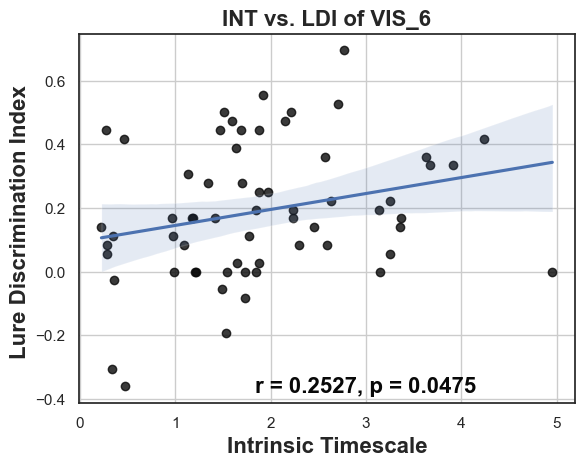

In [316]:
LDI_df = pd.read_csv('./timescale/LDI_df.csv')
# ica_it_groupbyfactor = timescale_ica_df.groupby('ICA')
ica_it_groupbyfactor = timescale_net_df.groupby('ICA')
for factor, group in ica_it_groupbyfactor:
  # print(factor,group)
  # break
  slope, intercept, r_value, p_value, std_err = stats.linregress(group['Timescale'], LDI)
  if p_value < 0.05:
    print(factor,r_value, p_value)
    # break
    save_path = 'cuneus_INTvsLDI.jpg'
    maker = 'o'
    col = '.03'
    maker = 'o'
    plot_sns_linear(group['Timescale'],LDI,r_value, p_value, col, maker,factor,save_path) 

In [315]:
def plot_sns_linear(x, y,r_value,p_value,col,maker,name,save_path = None):
    
    fig = plt.figure()
    ax = sns.regplot(x= x , y = y,
                        # data= stroke_reconfiguration_all,#x此时为离散变量
                 color= col,
                 marker= maker,line_kws = dict(color="b")
                 )
    # ax.text(3.5, 0.3, f'y = {round(slope,2)}*x+{round(intercept,2)}', ha="center", va="center", color="#5959AB", 
    #     fontsize= 12, fontweight='bold')
    min_y = np.min(y)
    ax.text(3, min_y, f'r = {round(r_value,4)}, p = {round(p_value,4)}', ha="center", va="center", 
            color= col, 
        fontsize= 16, fontweight= 'bold')
    ax.set_xlabel("Intrinsic Timescale",fontdict={ 'fontproperties':"Arial",'fontsize':16, 'weight':'bold'})
    ax.set_ylabel("Lure Discrimination Index ",fontdict={ 'fontproperties':"Arial",'fontsize':16, 'weight':'bold'})
    ax.set_title(f'INT vs. LDI of {name}',fontsize = 16,weight = 'bold')
    plt.xticks(fontname = "Arial") 
    plt.yticks(fontname = "Arial")
    plt.grid()
    if save_path:
        fig.savefig(save_path,bbox_inches='tight', pad_inches= 0, dpi=500)
        
# elder_timescale_ica_df = timescale_ica_df[timescale_ica_df['Group'] == 'Elder']
# ica_it_groupbyfactor = elder_timescale_ica_df.groupby('ICA')
# ica_it_groupbyfactor = timescale_ica_df.groupby('ICA')
# sns.set_style("whitegrid")
# # sinplot()
# sns.despine(top=True, right=True, left=False, bottom=False)
# rs = []
# ps = []
# for factor, group in ica_it_groupbyfactor:
#     # print(factor,group)
#     # break
#   r, p =  one_tailed_linerr(group['Timescale'], LDI)
#   rs.append(r)
#   ps.append(p)

# p_correct = correct_pvals_array(ps)
# # print(p_correct)
# for i, p in enumerate(p_correct):
#   if p < 0.1:
#       factor = ica_label[i]
#       r = rs[i]
#       print(f"==> {factor,r,p}")
#       # slope, intercept, r_value, p_value, std_err = stats.linregress(Y, X[:,num])
#         # plot the r and 
#       # if factor.startswith('recruitment'):
#       #     col = '#5959AB'
#       #     maker = '*'
#       # elif name.startswith('integration'):
#           # col = '#FFB90F'
#       #     maker = 'o'
#       # else:
#       #     col = '#FF6666'
#       #     maker = '^'            
#       slope, intercept, r_value, p_value, std_err = stats.linregress(group['Timescale'], LDI)   
#       # save_path = f'./Results/Backup0330/Relationship/poor/fe_{name[:-11]}.png'
#       # save_path = 'GMV/int_LDI_Cuneus3.jpg'
#       # col = '#5959AB'
#       maker = 'o'
#       col = '.03'
#       maker = 'o'
#       plot_sns_linear(group['Timescale'],LDI,r, p, col, maker,factor,save_path)  
#           # break

In [171]:
def correct_pvals_array(pvals, method='fdr_bh'):
    ''' Perform multiple comparison correction on p-values arranged into square
    array. 
    
    Args:
        pvals (array_like): 
            Upper-triangular array of p-values.
        method (str):
            Correction method passed to multipletests function from statsmodels
            library.
            
    Returns
        (array_like): Corrected p-vales. Same dimension as input array.
    '''
    pvals_vec = pvals

    pvals_vec_corrected = multipletests(
        pvals_vec,
        alpha= 0.1,
        method=method,
        is_sorted=False,
        returnsorted=False,
        )[1]
    return pvals_vec_corrected